[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/havelhakimi/DryBeans/blob/master/EDA_GNB_PCA_LR_on_DryBeans.ipynb)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

Dataset and its related information is availabe at:
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

## **Load the dataset**

In [ ]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


**Rows and Columns**

In [ ]:
df.shape

(13611, 17)

**Data Types of Attribues and Non-Null values Count**
<br>
All attributes are continuous type except the class attribute which contains Bean Type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

**Descriptive Statistics of Numerical Attributes**

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


**Duplicate values in Dataset**

In [ ]:
print(f'Duplicate rows in the datsaset :{df.duplicated().sum()}\n')

print('Bean type of duplicated rows:')
print(df[df.duplicated()].Class.value_counts())


print('\nDisplaying the duplicated rows')
df[df.duplicated(keep=False)]

Duplicate rows in the datsaset :68

Bean type of duplicated rows:
HOROZ    68
Name: Class, dtype: int64

Displaying the duplicated rows


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039.257,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


**Dropping Duplicate valuesfrom dataset**

In [ ]:
df=df.drop_duplicates()
df.shape

(13543, 17)

**Value Counts of various types of Beans**

In [ ]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## **Class distribution of various types of beans**

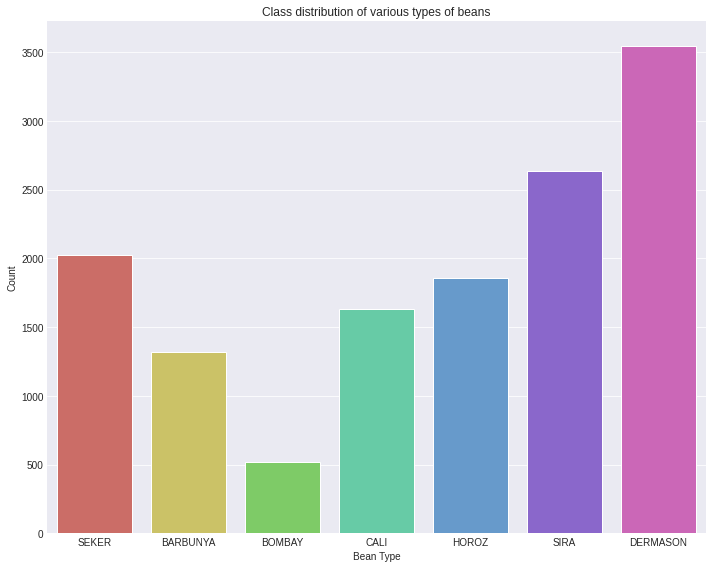

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(df.Class,palette='hls')   #palette='Set2', #palette='viridis' ,# palette='husl'
plt.xlabel('Bean Type')
plt.ylabel('Count')
plt.title('Class distribution of various types of beans')
plt.tight_layout()



* The dataset has an unequal distribution of datapoints in various classes.
* This is an imbalanced dataset.
* DERMASON is the most dominant class.
* BOMBAY is the most rare class.



### **Missing Values**

In [ ]:
df.isnull().sum()



*   There are no missing values in the dataset
*   Same conclusion has been visulaised via missingno library in the below graph



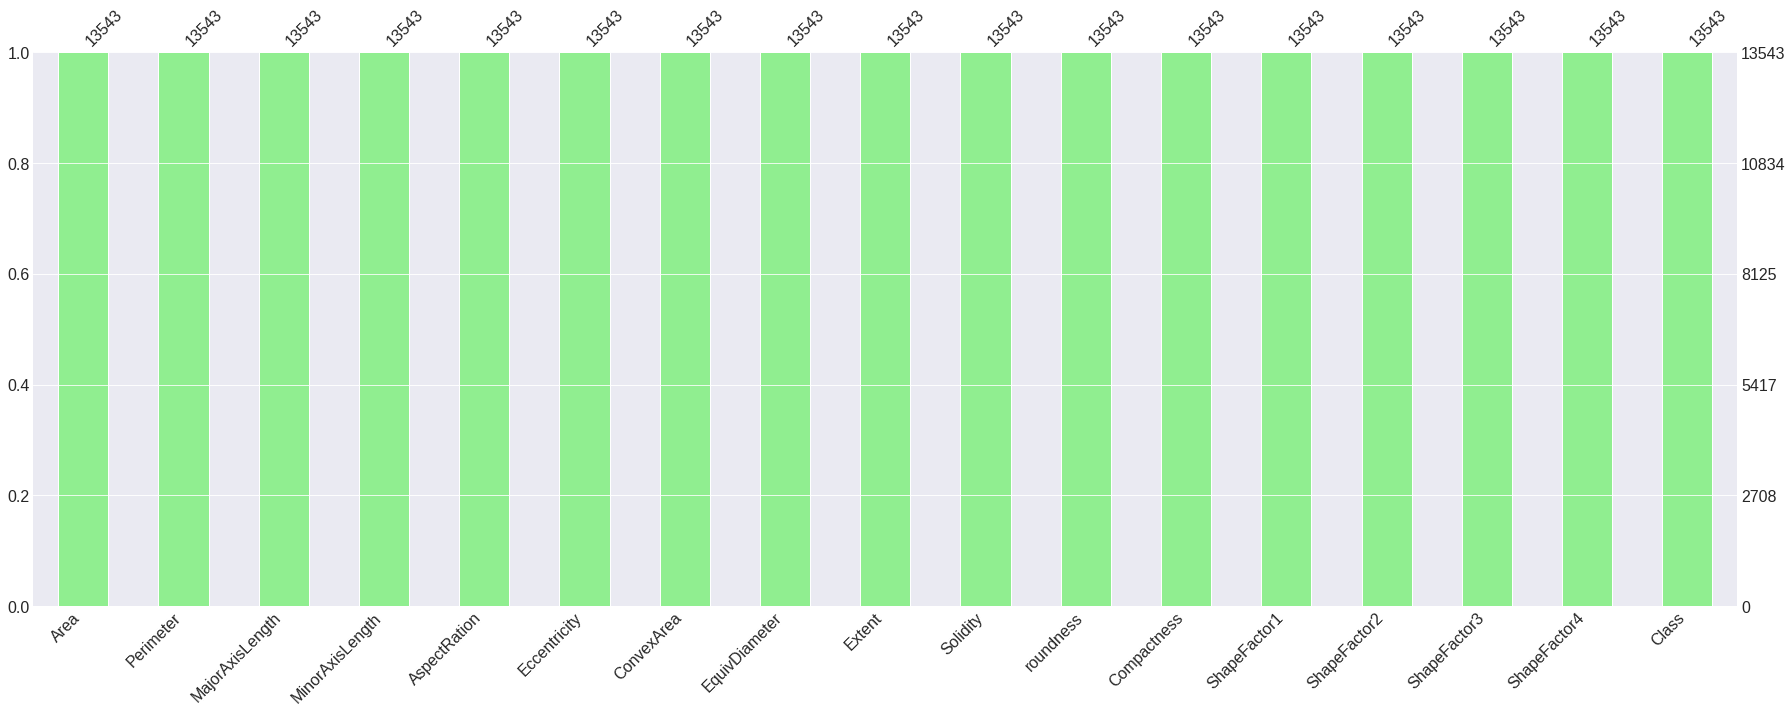

In [ ]:
import missingno as no

plt.figure(figsize=(5,5))
no.bar(df,color='lightgreen')
#plt.title('Missing')
plt.tight_layout()

### **Categorical scatter plot for Attributes**




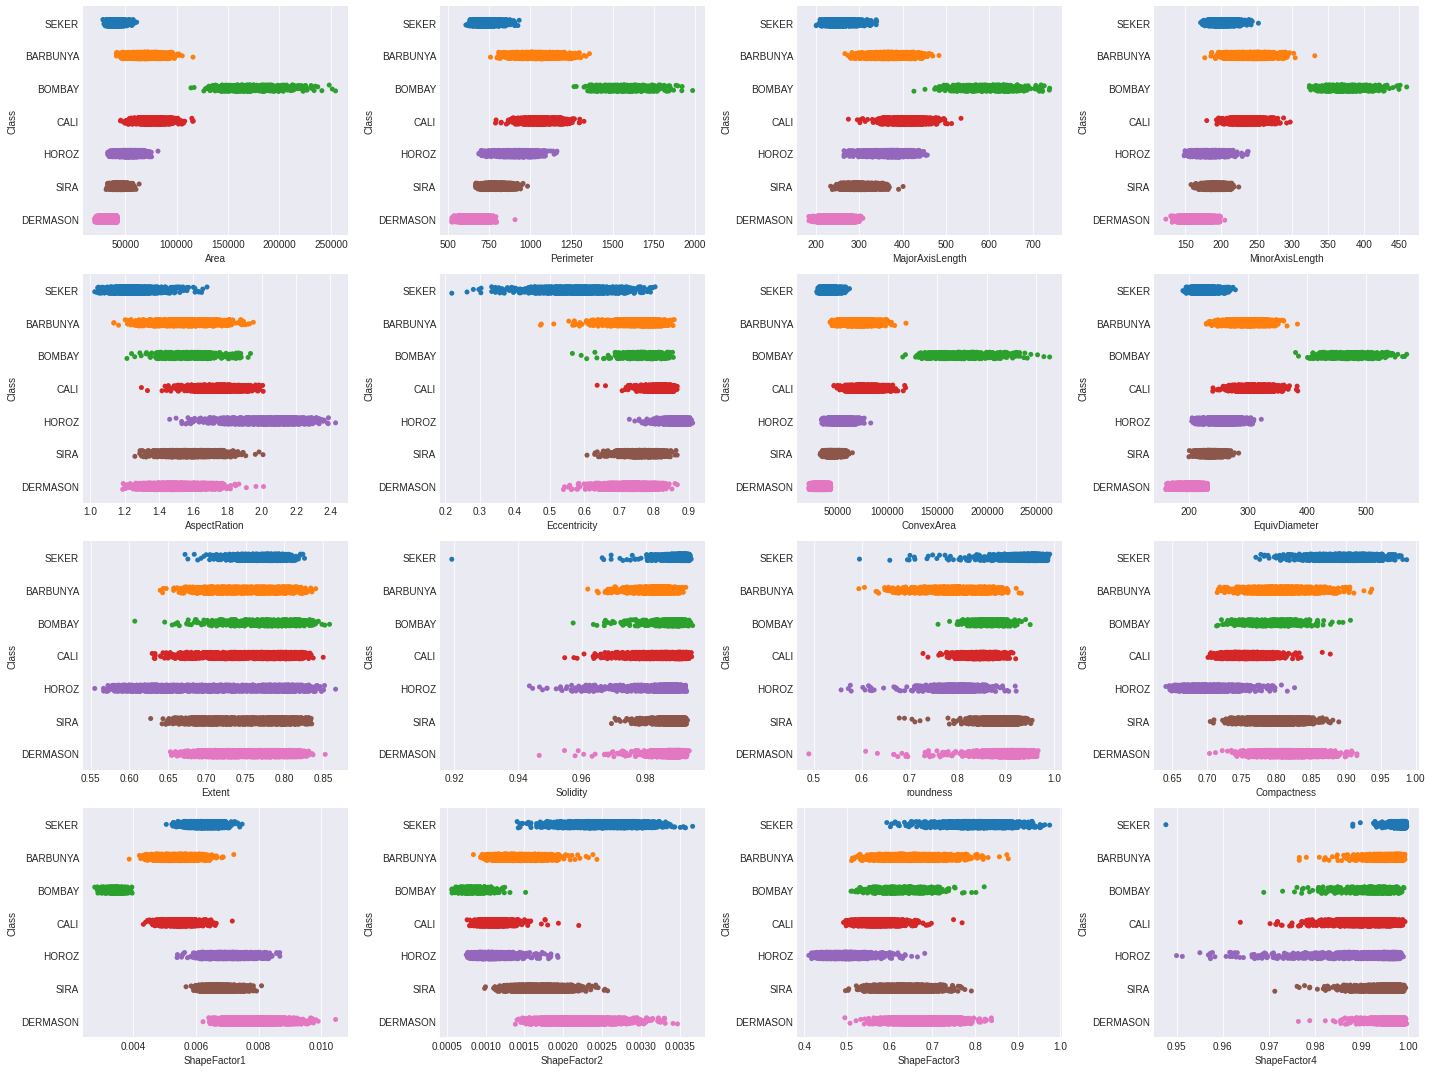

In [ ]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(20, 15))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.stripplot(x=df[variable],y=df.Class ,ax=subplot)
plt.tight_layout()

*   The distribution of BOMBAY class in many attribtes like *Area*, *MinorAxisLength*, *Convex Area*, *Minor Axis Length*, *ShapeFactor1* is well separated from other classes.
*   *Area* & Convex Area have very similar distribution across all classes indicating very high correlation.
* Distribution of *DERMASON* is very similar *SEKER* in many attributes for e.g. roundness, solidity, ShapeFactor2
* For the **extent** attribute the range of values is similar for all the bean classes which indicates that the bounding box to the bean area(measured  by extent attribute)  represented for all classes is equally good.

### **Cumulative Distribution of numerical attributes for the complete set of classes (Univariate Analysis)**




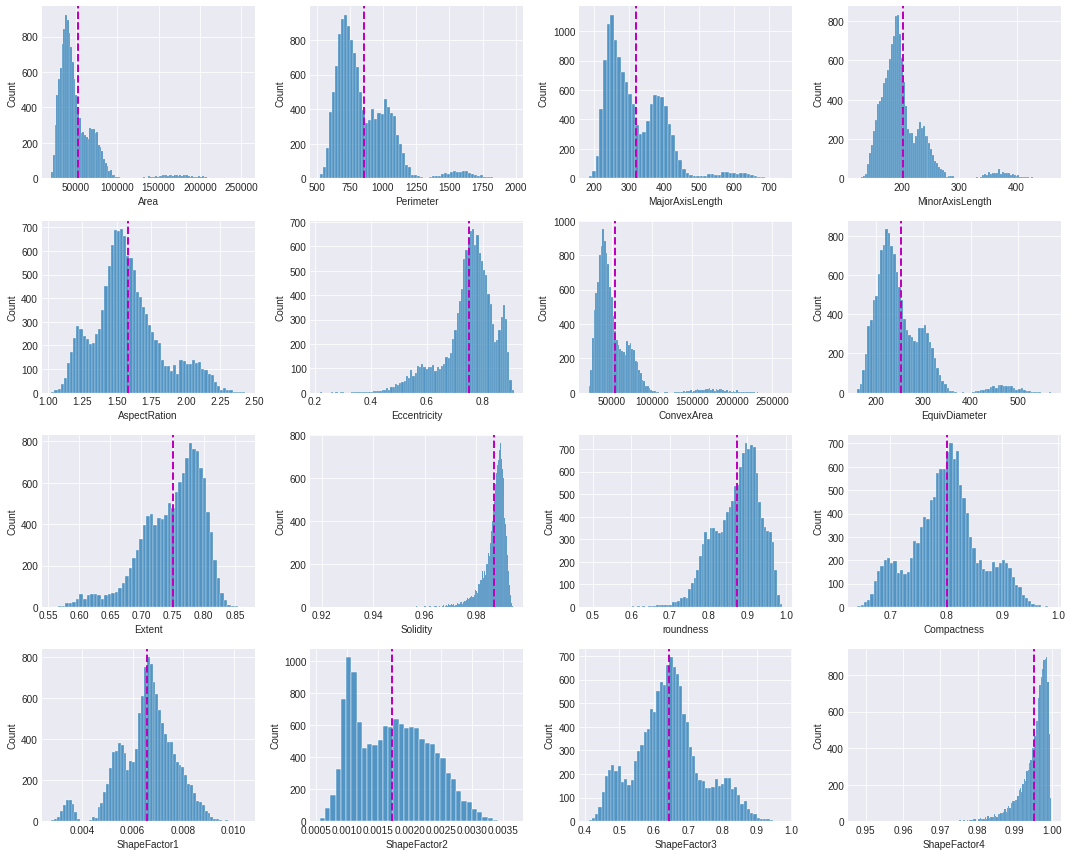

In [ ]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data=df,x=variable ,ax=subplot) #working with default bin size
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

Below is Univariate distribution per attribute for each class separately which shows that seed type **BOMBAY**<br> has distinct distribution from others on several attributes

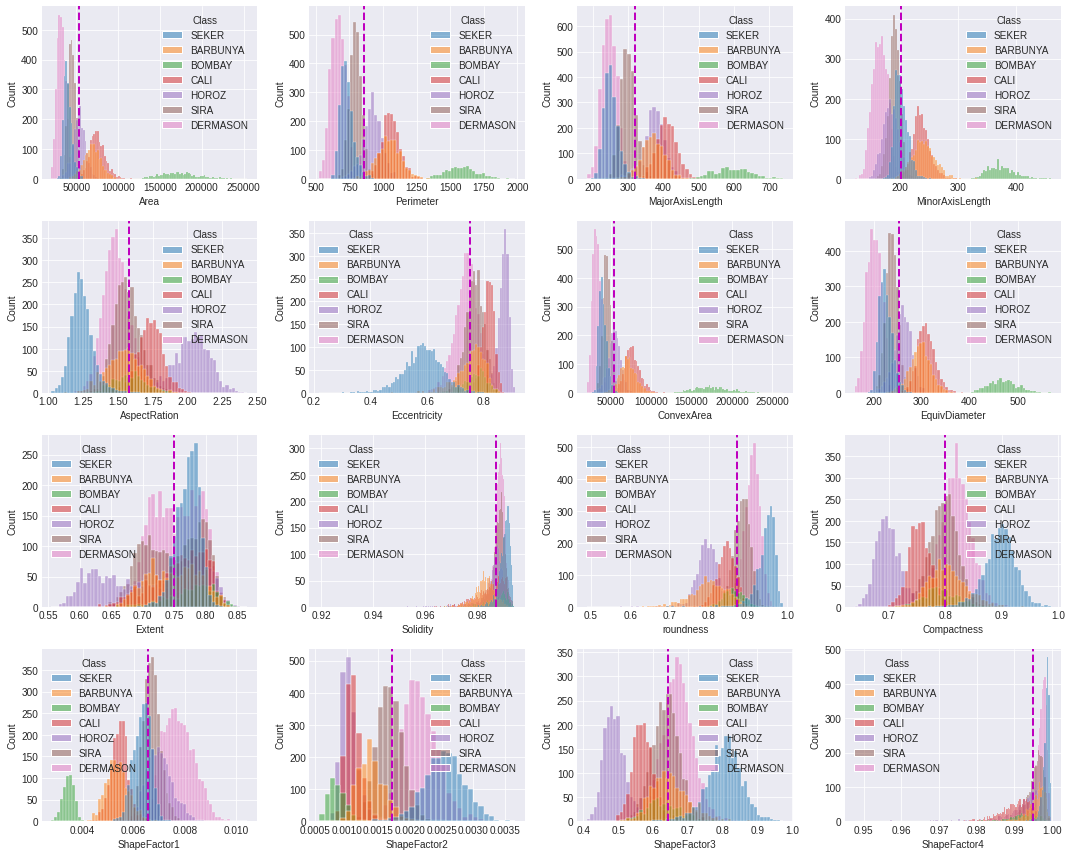

In [ ]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data=df,x=variable, ax=subplot,hue='Class')
    #g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

* Some attributes like **Shape Factor2, Solidity** exhibit highly skewed distribiution with long tails.
* Many of them are bi-modal which means that the individual class wise distributions making up the cumulative plot for that attribute are different for each class.

### **Boxplot of attributes for each type of bean:**


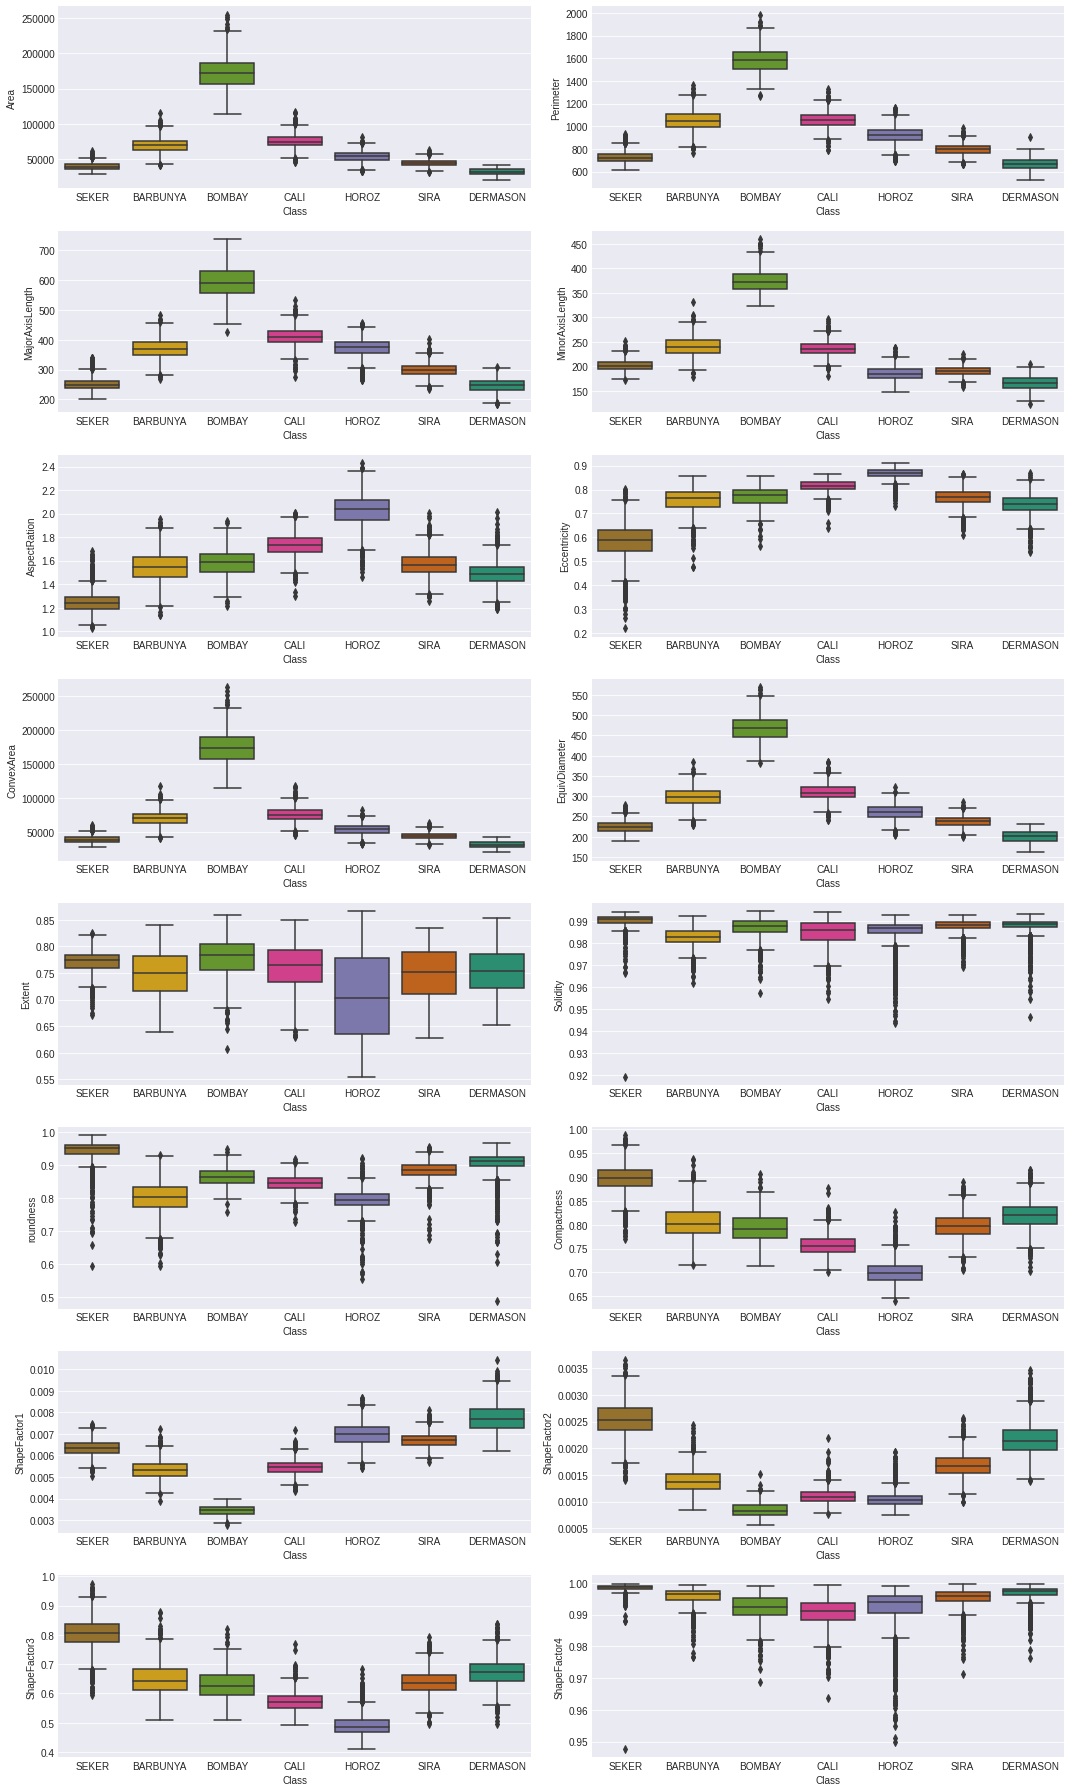

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(numerical_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot,palette='Dark2_r')
plt.tight_layout()

* Box plot analysis show there are lot of outliers in some attributes like **solidity**, **roundness** , **ShapeFactor4**
* There are verly less oultiers for the attribute **extent**
* It can be seen that Bombay and Horoz class are distinct from other classes for many attributes

### **Boxplot for each attribute**

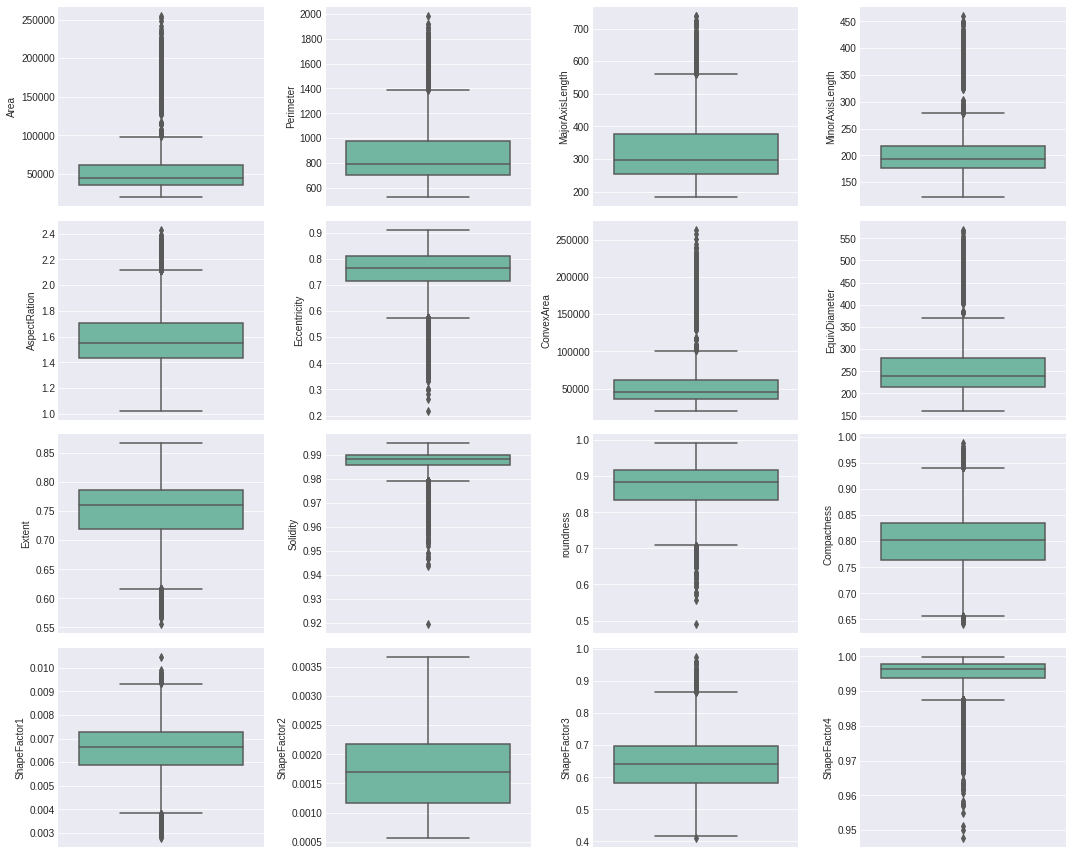

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(numerical_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot,palette='Set2')
plt.tight_layout()

### **Violin Plot of numerical attributes for each type of bean**


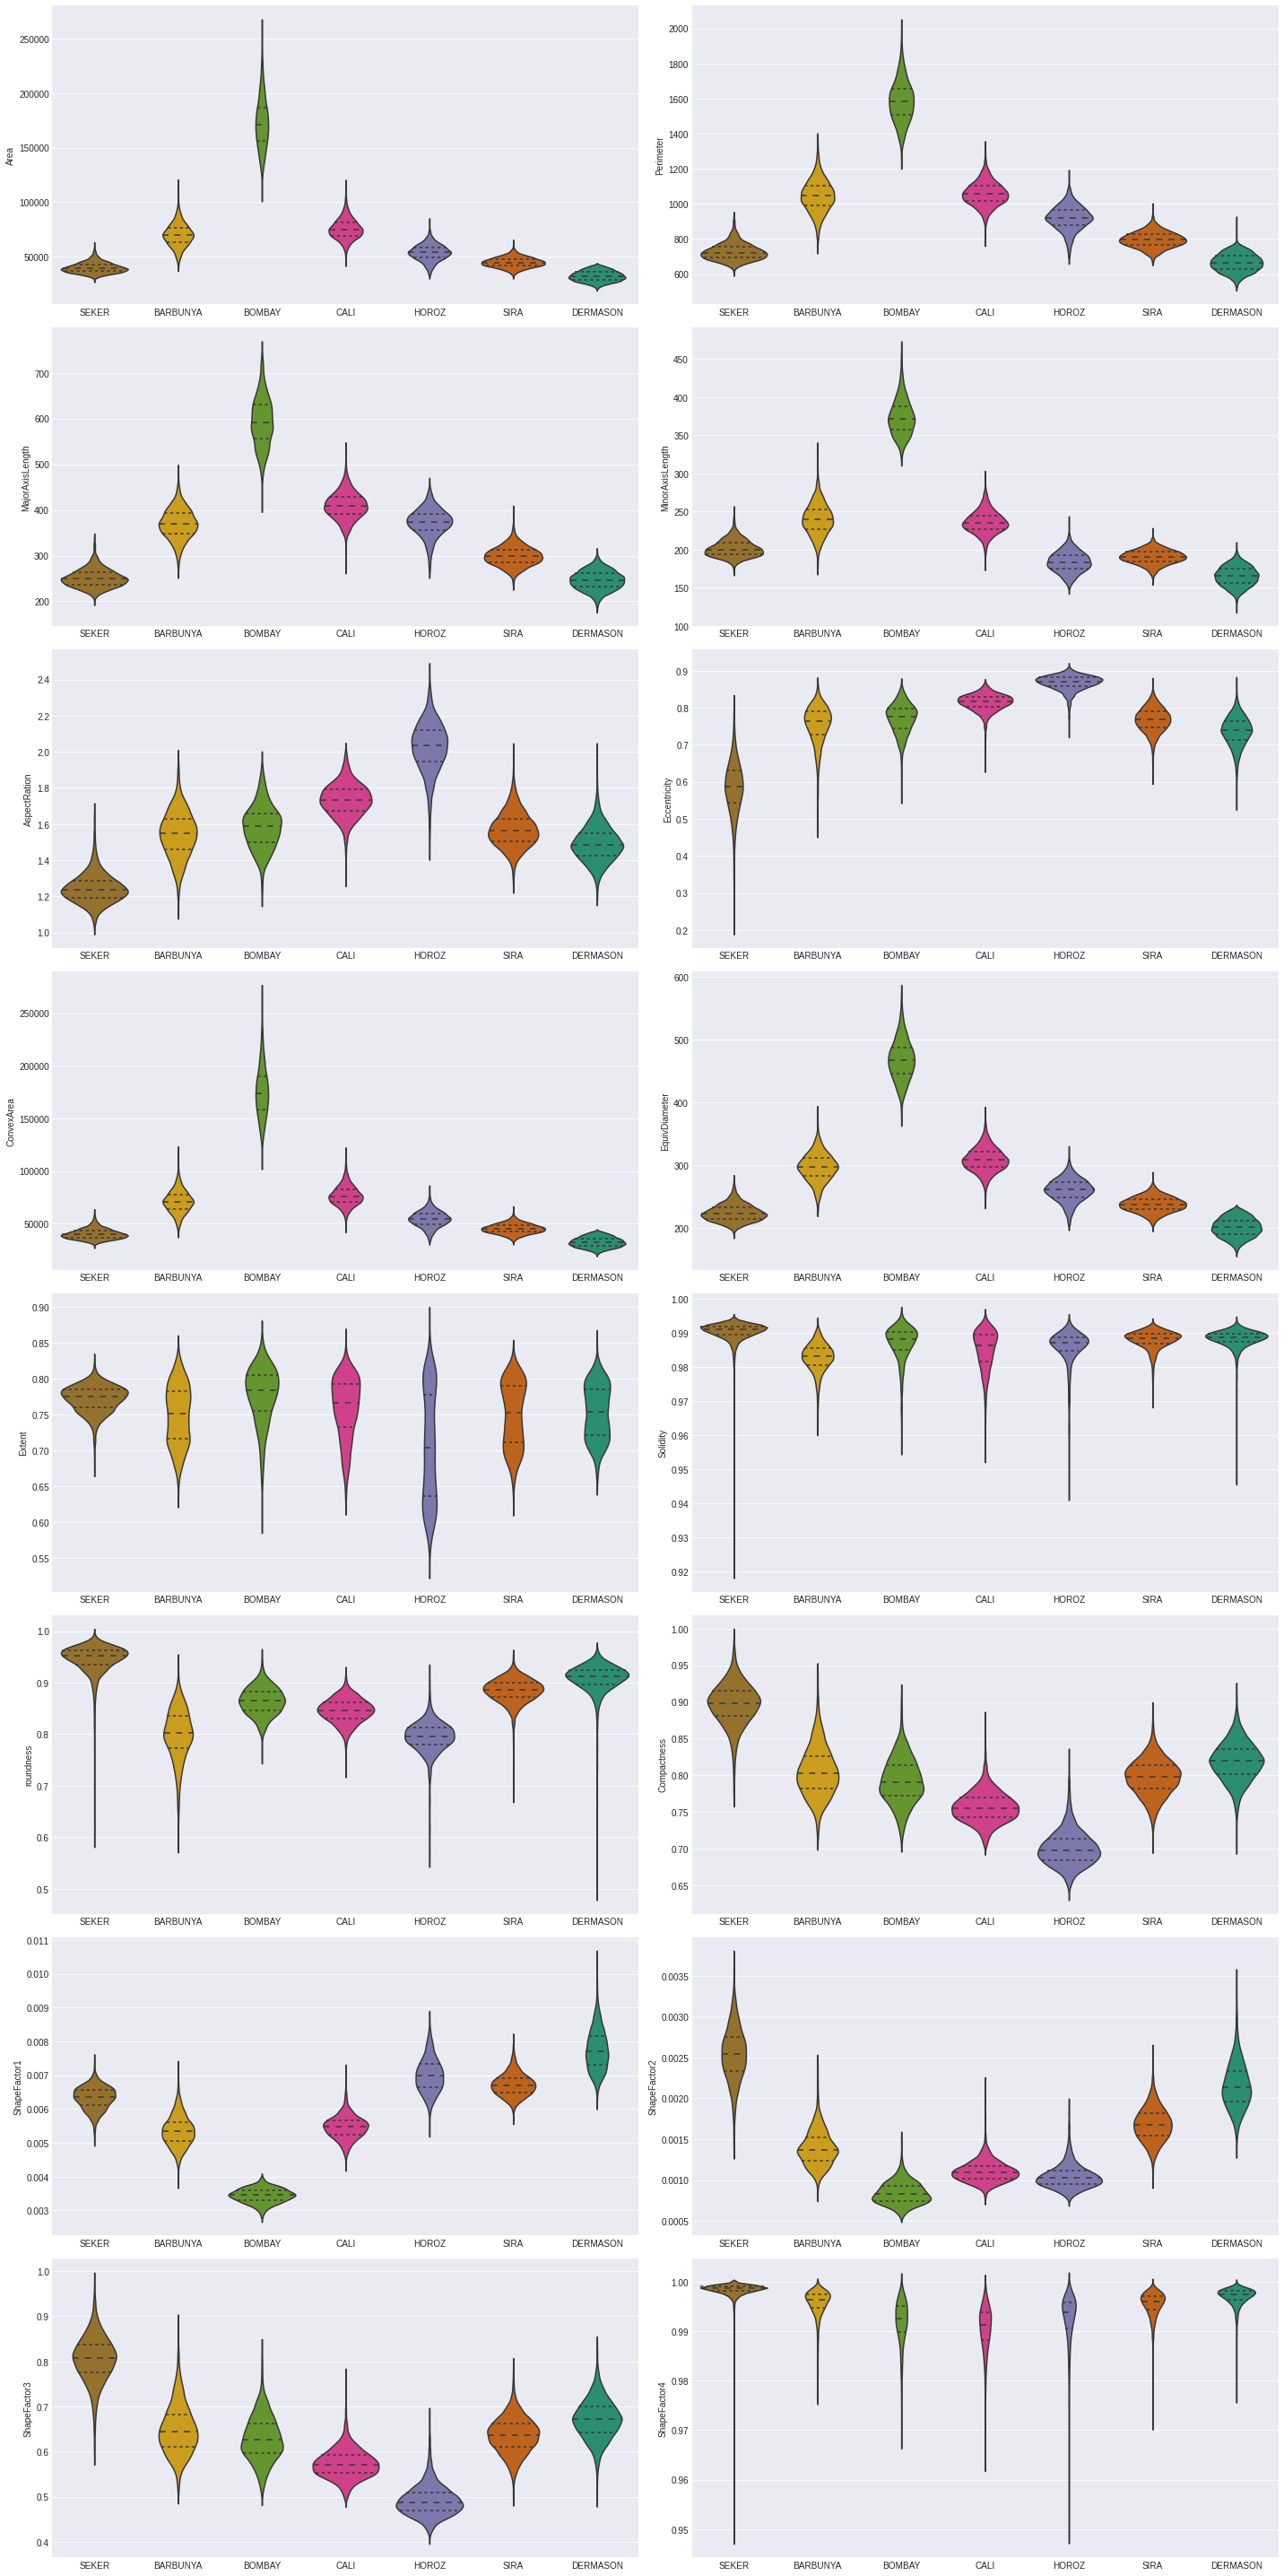

In [ ]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(numerical_cols, axes.flatten()):
    sns.violinplot(data=df,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax, palette='Dark2_r')
    ax.set(xlabel=None)
plt.tight_layout()

* For various attributes Bombay class clearly differs from other classes as observed in the above violin plot

### **Violin Plot for each attribute**

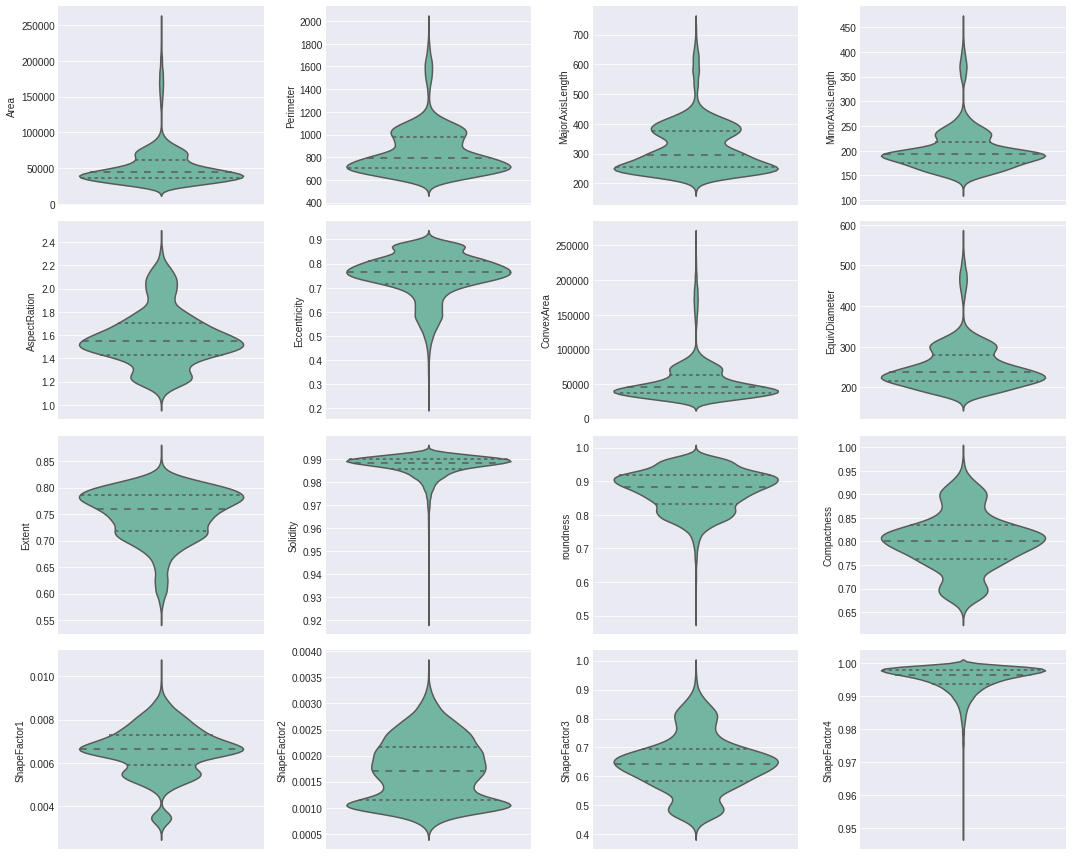

In [ ]:
fig, axes = plt.subplots(4, 4, figsize = (15, 12))
for feature, ax in zip(numerical_cols, axes.flatten()):
    sns.violinplot(data=df,
                   y=feature,
                   inner="quartile",
                   ax=ax, palette='Set2')
    ax.set(xlabel=None)
plt.tight_layout()

### **Correlation Matrix**


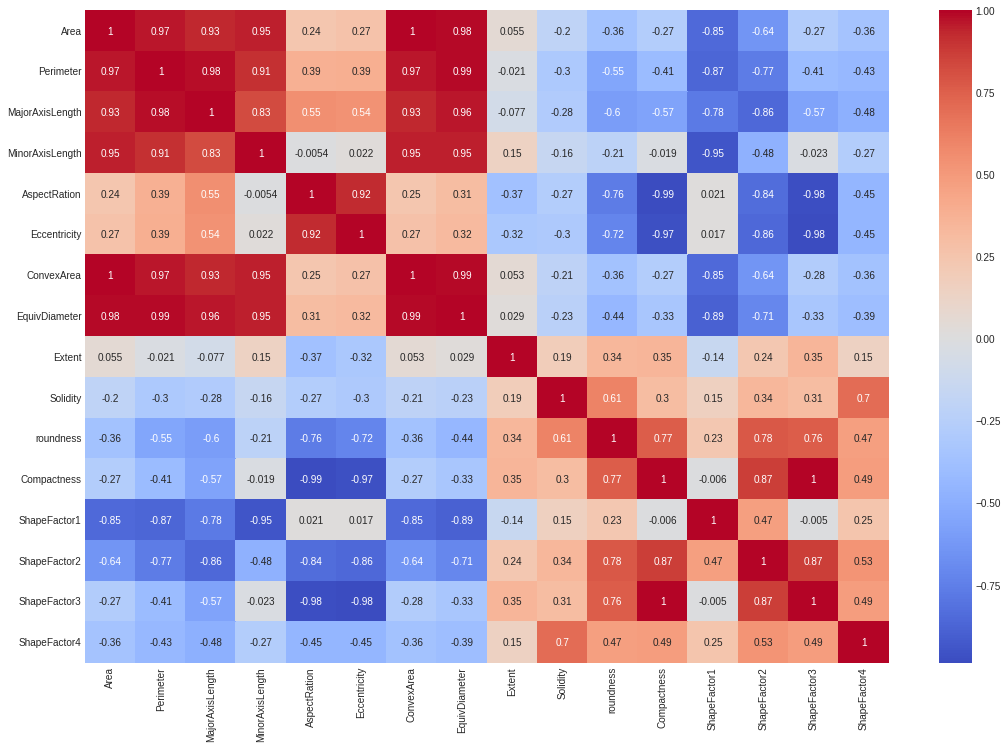

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='coolwarm')
plt.show()

* Many of the attributes are highly correlated as observed from the correlation matrix below, thus PCA would be an apt choice to reduce the dimensionality and produce uncorrelated features.
* There a lot of highly correlated attributes in the above correlation matrix, for eg: </br>

    *   **Area & Convex Area**:1
    *   **Shaped Factor3 & Comapctness**:1
    *   **Aspect ration & compactness**: -0.99
    *   **Area & Perimeter**: 0.97
    *   **Perimeter & ShapeFactor1**: -0.87
    *   **Aspect ration & Eccentricity**: 0.92 </br>
* Some attributes with low level of correlation among them:
    *   **Extent & EquivDiameter**: 0.029
    *   **Solidity & Eccentricity**: -0.3
    *   **Compactnes & Area**: -0.27



### **Overall Summary of insights from the EDA**

*   The distribution of BOMBAY class in many attributes like *Area*, *MinorAxisLength*, *Convex Area*, *Minor Axis Length*, *ShapeFactor1* is well separated from other classes.
*   *Area* & Convex Area have very similar distribution across all classes indicating very high correlation.
* For the **extent** attribute the range of values is similar for all the bean classes which indicates that the bounding box to the bean area(measured  by extent attribute)  represented for all classes is equally good.
* Some attributes like **Shape Factor2, Solidity** exhibit highly skewed distribiution with long tails.
*   Box plot analysis show there are lot of outliers in some attributes like **solidity**, **roundness**, **ShapeFactor4**.
* For various attributes Bombay class clearly differs from other classes as observed from the violin plot and box plot.
* Many of the attributes are highly correlated as observed from the correlation matrix above, thus PCA would be an apt choice to reduce the dimensionality and produce uncorrelated features.



## **TSNE visualisation of dataset**
According to the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) documentation:


*   Consider selecting a value between 5 and 50
*   Larger datasets usually require a larger perplexity

Since it is a 13k+ rows dataset thus I selected **perplexity** value to be 50



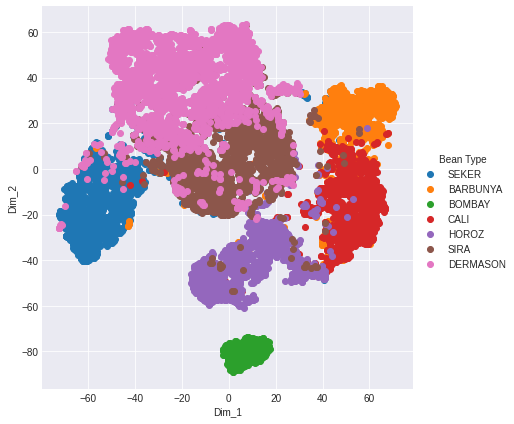

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

tsne_model = TSNE(n_components = 2, random_state = 0,perplexity=50) # rest values are default

data=df.drop(columns='Class').values
labels=df['Class']

# data has been standarized before being fed to TSNE
standardized_data = StandardScaler().fit_transform(data)

tsne_data = tsne_model.fit_transform(standardized_data)



tsne_data_lab = np.vstack((tsne_data.T, labels)).T #vstack stacks array row-wise (3,13543).T --> (13543,3)
tsne_df = pd.DataFrame(data = tsne_data_lab,
     columns =("Dim_1", "Dim_2", "Bean Type"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="Bean Type", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()



*   BOMBAY class is well separated from other classes
*   For other classes there are partially overlapping clusters
*   SIRA and DERMASON have highly overlapping clusters



## **Used Gaussian Naive Bayes and Mutlinomial Naive Bayes for model training**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score


X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values




X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)


gnb = GaussianNB()
mnb= MultinomialNB()

gnb.fit(X_train,Y_train)
mnb.fit(X_train,Y_train)

Y_pred_gnb=gnb.predict(X_test)
Y_pred_mnb=mnb.predict(X_test)


print(f'****Gaussian Naive bayes:****\n')
print(f'Accuracy:{accuracy_score(Y_test,Y_pred_gnb)}')
print(f"Precision:{precision_score(Y_test,Y_pred_gnb,average='macro')}")
print(f"Recall:{recall_score(Y_test,Y_pred_gnb,average='macro')}")
print("")
print(f'****Multinomial Naive bayes:****\n')
print(f'Accuracy:{accuracy_score(Y_test,Y_pred_mnb)}')
print(f"Precision:{precision_score(Y_test,Y_pred_mnb,average='macro')}")
print(f"Recall:{recall_score(Y_test,Y_pred_mnb,average='macro')}")



****Gaussian Naive bayes:****

Accuracy:0.7722406792174235
Precision:0.7732285202856521
Recall:0.7715772157346387

****Multinomial Naive bayes:****

Accuracy:0.7914359542266519
Precision:0.7955018811026359
Recall:0.792122013177338


In [ ]:
from sklearn.metrics import classification_report
print('Gaussian NB class. report\n')
print(classification_report(Y_test, Y_pred_gnb, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))


print('Multinomial NB class. report\n')

print(classification_report(Y_test, Y_pred_mnb, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))

Gaussian NB class. report

              precision    recall  f1-score   support

    DERMASON       0.89      0.85      0.87       754
        SIRA       0.74      0.80      0.77       515
       SEKER       0.72      0.71      0.71       422
       HOROZ       0.77      0.77      0.77       348
        CALI       0.67      0.80      0.73       315
    BARBUNYA       0.62      0.47      0.54       258
      BOMBAY       1.00      1.00      1.00        97

    accuracy                           0.77      2709
   macro avg       0.77      0.77      0.77      2709
weighted avg       0.77      0.77      0.77      2709

Multinomial NB class. report

              precision    recall  f1-score   support

    DERMASON       0.89      0.86      0.87       754
        SIRA       0.72      0.82      0.76       515
       SEKER       0.81      0.75      0.78       422
       HOROZ       0.82      0.80      0.81       348
        CALI       0.73      0.75      0.74       315
    BARBUNYA       0.



*   Contrary to the usual expectations, Multinomial Naive bayes is performing better than Gaussian Naive bayes on this dataset.
*   The input attributes of this dataset are contninous real values and Multinomial NB works best when input attributes are categorical in nature.
* However the results indicate better metrics for Multinomial NB.
* A possible reason of this discrepancy could be that the continous feature values are repeated for many datapoints which gives them a categorical nature, thus making the Multinomial NB probability estimates better than the Gaussian one.
* Below cell shows value counts for two attributes to highlight the point that continous values are repeated in this dataset.

In [ ]:
df['Area'].value_counts(), df['Perimeter'].value_counts()

(34594    4
 36109    4
 52266    4
 29709    4
 28122    4
         ..
 73969    1
 73973    1
 74034    1
 74044    1
 42159    1
 Name: Area, Length: 12011, dtype: int64, 683.341     3
 968.674     2
 670.479     2
 800.405     2
 687.923     2
            ..
 1041.011    1
 1017.763    1
 1037.806    1
 1034.771    1
 772.237     1
 Name: Perimeter, Length: 13416, dtype: int64)

## **PCA to reduce no of features and used the reduced data for model training**
## **Below code retains variance values in the range [90%-100%)**
Highest metrics are achieved when retained 90% of the original variance

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)

s=StandardScaler()
X_train_=s.fit_transform(X_train)
X_test_=s.transform(X_test)


gnb=GaussianNB()

metrics={}
metrics['accuracy']=[]
metrics['precision']=[]
metrics['recall']=[]
metrics['f1score']=[]


variance_range=np.arange(0.9,1,0.01)
for var in variance_range:

  print(f'Amount of variance: {var.round(3)}')

  pca = PCA(n_components=var, svd_solver='full')
  X_train_=pca.fit_transform(X_train_)
  X_test_=pca.transform(X_test_)

  gnb.fit(X_train_,Y_train)
  Y_pred=gnb.predict(X_test_)
  print(f'Accuracy:{accuracy_score(Y_test,Y_pred)}')
  print(f"Precision:{precision_score(Y_test,Y_pred,average='macro')}")
  print(f"Recall:{recall_score(Y_test,Y_pred,average='macro')}")
  print(f"F1 score {f1_score(Y_test,Y_pred,average='macro')}")
  print()
  metrics['accuracy'].append(accuracy_score(Y_test,Y_pred))
  metrics['precision'].append(precision_score(Y_test,Y_pred,average='macro'))
  metrics['recall'].append(recall_score(Y_test,Y_pred,average='macro'))
  metrics['f1score'].append(f1_score(Y_test,Y_pred,average='macro'))





Amount of variance: 0.9
Accuracy:0.8689553340716132
Precision:0.8729465845453733
Recall:0.8708146221823762
F1 score 0.8708528079314736

Amount of variance: 0.91
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.92
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.93
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.94
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.95
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.96
Accuracy:0.8634182355112587
Precision:0.8671505768511244
Recall:0.8625882139580304
F1 score 0.862373947517969

Amount of variance: 0.97
Accuracy:0.863418235511

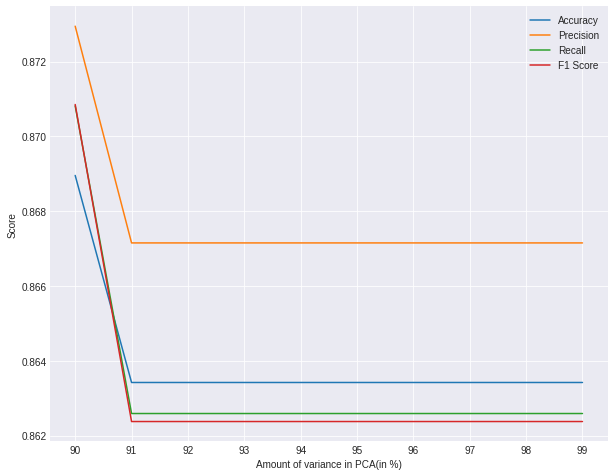

In [ ]:
x=[0,1,2,3,4,5,6,7,8,9]
var_range=[90,91,92,93,94,95,96,97,98,99]
plt.figure(figsize=(10,8))
#fig,ax = plt.subplots()
plt.plot(metrics['accuracy'],label='Accuracy')
plt.plot(metrics['precision'],label='Precision')
plt.plot(metrics['recall'],label='Recall')
plt.plot(metrics['f1score'],label='F1 Score')
plt.xticks(x,var_range)
plt.ylabel('Score')
plt.xlabel('Amount of variance in PCA(in %)')
plt.legend()
plt.show()

## **Plotting ROC-AUC curves**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay



X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)

s=StandardScaler()
X_train_=s.fit_transform(X_train)
X_test_=s.transform(X_test)
Y_test = LabelBinarizer().fit_transform(Y_test)


gnb=GaussianNB()
gnb.fit(X_train,Y_train)
proba=gnb.predict_proba(X_test)




fpr = dict()
tpr = dict()
roc_auc = dict()



for i in range(7): #there are 7 classes
    y_test_bin = Y_test[:,i]
    y_score = proba[:,i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])




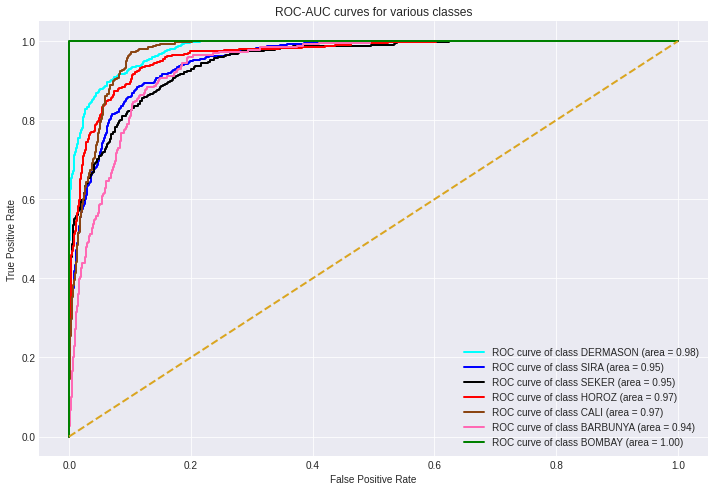

In [ ]:
dct={'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}
dct={v:k for k,v in dct.items()}

plt.figure(figsize=(12,8))
colors = ["cyan", "b", "black","r","saddlebrown","hotpink","g"]
for i, color in zip(range(7), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(dct[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], color="goldenrod", lw=2, linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC curves for various classes")
plt.legend(loc="lower right")
plt.show()



1.   AUC score ranges from 0.95-1.0 for various classes
2.   BOMBAY has the highest AUC score of 1, which confirms the EDA analysis where BOMBAY is the most easily separable class for various attributes.
3. The high AUC scores for all the classes indictaes that Gaussian NB has been able to sucessfully classify the dataset despite the unequal distribution of various classes



## **Multinomial Logsitic Regression on the dataset and comparison with Gaussian Naive Bayes**


*   Performed below is Multinomial Logsitic Regression on this dataset.
*   There are various hyperparameters available for Logistic Regression such as:</br>
max_iter, multi_class, penalty, solver,
* We  are tuning two hyperparameters values i.e. max_iter and verbose and keeping all others set to their default values.
* max_iter: MAximum no of iterations taken by the Logistic Regression algorithm
* verbose: Produces the logging output
* The best performance is coming  when **max_iter** is set to 150 and **verbose** is set to 1.








**setting max_iter to 50 and verbose=1**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score


X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LogisticRegression(max_iter=50,verbose=1)
gnb=GaussianNB()

lr.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)


Y_pred_lr=lr.predict(X_test)
Y_pred_gnb=gnb.predict(X_test)

print('Logistic Regression:')
print(f"Accuracy:{accuracy_score(Y_test,Y_pred_lr)}")


print(classification_report(Y_test, Y_pred_lr, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))


print()
print('Gaussian NB:')
print(f"Accuracy: {accuracy_score(Y_test,Y_pred_gnb)}")


print(classification_report(Y_test, Y_pred_gnb, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression:
Accuracy:0.9287559985234404
              precision    recall  f1-score   support

    DERMASON       0.94      0.93      0.93       754
        SIRA       0.86      0.89      0.87       515
       SEKER       0.96      0.94      0.95       422
       HOROZ       0.96      0.96      0.96       348
        CALI       0.93      0.96      0.94       315
    BARBUNYA       0.92      0.90      0.91       258
      BOMBAY       1.00      1.00      1.00        97

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709


Gaussian NB:
Accuracy: 0.902547065337763
              precision    recall  f1-score   support

    DERMASON       0.95      0.89      0.92       754
        SIRA       0.82      0.88      0.85       515
       SEKER       0.93      0.94      0.93       422
       HOROZ       0.93      0.96      0.95       348
        CALI       0.87      0.91      0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


**setting max_iter to 150 and verbose=1**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score


X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LogisticRegression(max_iter=150,verbose=1)
gnb=GaussianNB()

lr.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)


Y_pred_lr=lr.predict(X_test)
Y_pred_gnb=gnb.predict(X_test)

print('Logistic Regression:')
print(f"Accuracy:{accuracy_score(Y_test,Y_pred_lr)}")


print(classification_report(Y_test, Y_pred_lr, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))


print()
print('Gaussian NB:')
print(f"Accuracy: {accuracy_score(Y_test,Y_pred_gnb)}")


print(classification_report(Y_test, Y_pred_gnb, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression:
Accuracy:0.9298634182355112
              precision    recall  f1-score   support

    DERMASON       0.94      0.93      0.93       754
        SIRA       0.86      0.89      0.87       515
       SEKER       0.96      0.94      0.95       422
       HOROZ       0.96      0.96      0.96       348
        CALI       0.93      0.96      0.94       315
    BARBUNYA       0.92      0.90      0.91       258
      BOMBAY       1.00      1.00      1.00        97

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709


Gaussian NB:
Accuracy: 0.902547065337763
              precision    recall  f1-score   support

    DERMASON       0.95      0.89      0.92       754
        SIRA       0.82      0.88      0.85       515
       SEKER       0.93      0.94      0.93       422
       HOROZ       0.93      0.96      0.95       348
        CALI       0.87      0.91      0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


**Setting all values to default which incudes max_iter to 100 and verbose=0**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score


X=df.drop(columns=['Class']).values
Y=df['Class'].map({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}).values

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2022)


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LogisticRegression()
gnb=GaussianNB()

lr.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)


Y_pred_lr=lr.predict(X_test)
Y_pred_gnb=gnb.predict(X_test)

print('Logistic Regression:')
print(f"Accuracy:{accuracy_score(Y_test,Y_pred_lr)}")


print(classification_report(Y_test, Y_pred_lr, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))


print()
print('Gaussian NB:')
print(f"Accuracy: {accuracy_score(Y_test,Y_pred_gnb)}")


print(classification_report(Y_test, Y_pred_gnb, target_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']))





Logistic Regression:
Accuracy:0.9294942783314877
              precision    recall  f1-score   support

    DERMASON       0.94      0.93      0.93       754
        SIRA       0.85      0.89      0.87       515
       SEKER       0.96      0.94      0.95       422
       HOROZ       0.96      0.97      0.96       348
        CALI       0.93      0.95      0.94       315
    BARBUNYA       0.92      0.90      0.91       258
      BOMBAY       1.00      1.00      1.00        97

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709


Gaussian NB:
Accuracy: 0.902547065337763
              precision    recall  f1-score   support

    DERMASON       0.95      0.89      0.92       754
        SIRA       0.82      0.88      0.85       515
       SEKER       0.93      0.94      0.93       422
       HOROZ       0.93      0.96      0.95       348
        CALI       0.87      0.91      0.

Logsitic Regression is performing better than Gaussian Naive Bayes for all the three choices of hyperparameters , the best is in the case when max_iter is set to 150